<a href="https://www.kaggle.com/code/yorkyong/wids-datathon-predicting-timely-treatment?scriptVersionId=159870028" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align:center;">
<img src="https://www.widsworldwide.org/wp-content/uploads/2023/09/WiDS_Logo_Mobile.png" alt="Logo" width="600" height="400">

# WiDS Datathon 2024 Challenge #1
# **Bridging Healthcare Gaps: Predicting Timely Treatment**🩺

</div>

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>1 |</span></b> <b>INTRODUCTION</b></div>

In this notebook, we embark on a journey to address one of the most critical challenges in healthcare today - ensuring equitable access to timely cancer diagnosis and treatment.

### <b><span style='color:#FFCE30'> 1.1 |</span> Background: Equity in Healthcare</b>
Women in Data Science (WiDS) Worldwide has embarked on a mission to increase the participation of women in data science, recognizing the profound societal impact it can bring. Healthcare inequity, a pervasive global issue, particularly affects women's health, which is fundamental for the well-being of societies and economies. This datathon aims to unveil disparities in cancer treatment, examining the multifaceted factors that contribute to these disparities, including demographics and societal influences.

### <b><span style='color:#FFCE30'> 1.2 |</span> The Challenge Ahead</b>
Our primary task revolves around predicting whether patients received a metastatic cancer diagnosis within 90 days of screening. Metastatic Triple-Negative Breast Cancer (TNBC) demands swift and precise intervention, and any delay in diagnosis and treatment can be catastrophic. Identifying variations in treatment access serves as a vital proxy to uncover healthcare inequalities.



Metastatic Triple-Negative Breast Cancer (TNBC) is a specific subtype of breast cancer that is characterized by the absence of three specific receptors on the surface of cancer cells: estrogen receptor (ER), progesterone receptor (PR), and human epidermal growth factor receptor 2 (HER2). 

- **Definition:** TNBC is classified as "triple-negative" because it lacks these receptors, making it different from other types of breast cancer. It accounts for approximately 10-15% of all breast cancer cases.

- **Metastatic Stage:** Metastatic TNBC refers to breast cancer that has spread to other parts of the body, such as the lungs, liver, bones, or brain. Metastatic breast cancer is often more challenging to treat than early-stage breast cancer.

- **Treatment:** Treatment for metastatic TNBC typically includes chemotherapy, targeted therapies, immunotherapy, and in some cases, radiation therapy or surgery to manage symptoms. The choice of treatment depends on the patient's specific case and the extent of metastasis.

- **Prognosis:** The prognosis for metastatic TNBC can vary widely depending on factors such as the extent of metastasis, the response to treatment, and overall health. Survival rates tend to be lower compared to other breast cancer subtypes.

More info: https://www.lbbc.org/about-breast-cancer/types-breast-cancer/metastatic-breast-cancer/metastatic-triple-negative


<img src="https://www.mdpi.com/pharmaceuticals/pharmaceuticals-15-00542/article_deploy/html/images/pharmaceuticals-15-00542-g001.png" alt="TNBC Illustration" width="800" height="400">

Source: Chaudhuri A, Kumar DN, Dehari D, Singh S, Kumar P, Bolla PK, Kumar D, Agrawal AK. Emergence of Nanotechnology as a Powerful Cavalry against Triple-Negative Breast Cancer (TNBC). Pharmaceuticals. 2022; 15(5):542. https://doi.org/10.3390/ph15050542 

### <b><span style='color:#FFCE30'> 1.3 |</span> The Goals</b>
As data scientists, our goals extend beyond predictions. We aim to build models that not only predict outcomes but also unravel the intricate relationship between patient demographics and timely treatment. Furthermore, we seek to understand the influence of environmental hazards on proper diagnosis and treatment, contributing to a comprehensive perspective on healthcare disparities.

This notebook will attempt to navigate the challenging terrain of data science and healthcare equity. Let's embark on this journey to bridge healthcare gaps, one prediction at a time.

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>2 |</span></b> <b>IMPORT + LOAD DATA</b></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load the data
train = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/training.csv")
test = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/test.csv")
sample_submission = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/sample_submission.csv")

In [3]:
train.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>3 |</span></b> <b>DATA PREPROCESSING + FEATURE ENGINEERING</b></div>


### <b><span style='color:#FFCE30'> 3.1 |</span> Exploratory Data Analysis</b>
We reference to the following notebook for extensive work done on EDA and modelling:

- https://www.kaggle.com/code/waleedabujaish/wids-starter-0-805-lb
- https://www.kaggle.com/code/ddosad/wids-data-exploration
- https://www.kaggle.com/code/aerdem4/wids-2024-lofo-feature-importance
- https://www.kaggle.com/code/vrushalimanka/wids-datathon-eda-baseline-model
- https://www.kaggle.com/code/ravi20076/wids2024challenge1-baseline-v1
- https://www.kaggle.com/code/farzonaeraj/equity-in-healthcare-eda-baseline-model

In [4]:
train.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.00,547381.20,260404.96,100063.00,321517.00,543522.00,772671.75,999896.00
patient_zip3,12906.00,573.75,275.45,101.00,331.00,554.00,846.00,999.00
patient_age,12906.00,59.18,13.34,18.00,50.00,59.00,67.00,91.00
bmi,3941.00,28.98,5.70,14.00,24.66,28.19,32.92,85.00
population,12905.00,20744.44,13886.90,635.55,9463.90,19154.19,30021.28,71374.13
density,12905.00,1581.95,2966.31,0.92,171.86,700.34,1666.52,21172.00
age_median,12905.00,40.50,4.04,20.60,37.13,40.64,42.93,54.57
age_under_10,12905.00,11.12,1.51,0.00,10.16,11.04,12.19,17.68
age_10_to_19,12905.00,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12905.00,13.29,3.35,5.92,11.01,12.54,14.97,62.10


In [5]:
#Categorical Columns
train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,6521,5,White,3588
payer_type,11103,3,COMMERCIAL,6032
patient_state,12855,50,CA,2438
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,24,2,PEMBROLIZUMAB,13
metastatic_first_novel_treatment_type,24,1,Antineoplastics,24
Region,12854,4,South,3919


In [6]:
#Font setting
ORANGE, BOLD, RESET = '\033[93m', '\033[1m', '\033[0m'

In [7]:
print(f"The data consists of {BOLD}{ORANGE}{train.shape[0]}{RESET} rows, and {BOLD}{ORANGE}{train.shape[1]}{RESET} columns")

The data consists of 12906 rows, and 83 columns


In [8]:
#Let's see how much are the missing values from the datset

total_missing = train.isnull().sum().sum()
total_cells = train.size
missing_percentage = (total_missing / total_cells) * 100
print(f"The total number of missing values are {BOLD}{ORANGE}{total_missing}{RESET},\
which is {BOLD}{ORANGE}{missing_percentage:.2f}%{RESET} of total data.")

The total number of missing values are 43292,which is 4.04% of total data.


In [9]:
# Lets check count & % of missing values in the dataset
missing_info = train.isna().mean() * 100
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)

for column, missing_percentage in missing_info.items():
    print(f"{BOLD}{column}{RESET} has {BOLD}{ORANGE}{train[column].isna().sum()}{RESET} missing values, which is {BOLD}{ORANGE}{missing_percentage:.2f}%{RESET} of the column.")

metastatic_first_novel_treatment has 12882 missing values, which is 99.81% of the column.
metastatic_first_novel_treatment_type has 12882 missing values, which is 99.81% of the column.
bmi has 8965 missing values, which is 69.46% of the column.
patient_race has 6385 missing values, which is 49.47% of the column.
payer_type has 1803 missing values, which is 13.97% of the column.
Region has 52 missing values, which is 0.40% of the column.
Division has 52 missing values, which is 0.40% of the column.
patient_state has 51 missing values, which is 0.40% of the column.
PM25 has 29 missing values, which is 0.22% of the column.
Ozone has 29 missing values, which is 0.22% of the column.
N02 has 29 missing values, which is 0.22% of the column.
income_household_75_to_100 has 4 missing values, which is 0.03% of the column.
income_household_150_over has 4 missing values, which is 0.03% of the column.
income_household_15_to_20 has 4 missing values, which is 0.03% of the column.
income_household_20_t

We can drop columns with the highest null values %:
- Patient_race, 
- Payer_type, 
- bmi,
- metastatic_first_novel_treatment,
- metastatic_first_novel_treatment_type

### <b><span style='color:#FFCE30'> 3.2 |</span> Transformers using classes </b>

In [10]:
# Import Library to build custom machine learning models or transformers using scikit-learn. 
from sklearn.base import BaseEstimator, TransformerMixin

## Drop Columns

In [11]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        
        return X.drop(self.cols, axis=1)

DropColumn(cols=['patient_race', 'payer_type', 'bmi','metastatic_first_novel_treatment','metastatic_first_novel_treatment_type']).fit_transform(train)

,patient_id,patient_state,patient_zip3,patient_age,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,CA,924,84,F,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,West,Pacific,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,CA,928,62,F,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,West,Pacific,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,TX,760,43,F,C50112,Malignant neoplasm of central portion of left ...,C773,South,West South Central,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,CA,926,45,F,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,West,Pacific,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,ID,836,55,F,1749,"Malignant neoplasm of breast (female), unspeci...",C773,West,Mountain,...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,OH,436,50,F,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,Midwest,East North Central,...,17.400000,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1
12902,452909,CA,945,50,F,C50912,Malignant neoplasm of unspecified site of left...,C773,West,Pacific,...,11.243210,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1
12903,357486,CA,926,61,F,C50912,Malignant neoplasm of unspecified site of left...,C7931,West,Pacific,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1
12904,935417,NY,112,37,F,1749,"Malignant neoplasm of breast (female), unspeci...",C773,Northeast,Middle Atlantic,...,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0


## Handle Missing Data

In [12]:
class MissingDataImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean', columns=None):
        self.strategy = strategy
        self.columns = columns

    def fit(self, X, y=None):
        if self.strategy == 'mean':
            if self.columns is not None:
                self.fill_values = X[self.columns].mean()
            else:
                self.fill_values = X.mean()
        elif self.strategy == 'mode':
            if self.columns is not None:
                self.fill_values = X[self.columns].mode().iloc[0]
            else:
                self.fill_values = X.mode().iloc[0]
        return self

    def transform(self, X):
        if self.columns is not None:
            X_copy = X.copy()
            X_copy[self.columns] = X_copy[self.columns].fillna(self.fill_values)
            return X_copy
        else:
            return X.fillna(self.fill_values)

In [13]:
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns.drop('DiagPeriodL90D')

In [14]:
# Initialize the MeanImputer with numerical_cols for mean imputation
mean_imputer = MissingDataImputer(strategy='mean', columns=numerical_cols)

# Fit and transform the train and test data using the specified numerical columns
df_train_mean = mean_imputer.fit_transform(train)

In [15]:
df_train_mean.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.00,547381.20,260404.96,100063.00,321517.00,543522.00,772671.75,999896.00
patient_zip3,12906.00,573.75,275.45,101.00,331.00,554.00,846.00,999.00
patient_age,12906.00,59.18,13.34,18.00,50.00,59.00,67.00,91.00
bmi,12906.00,28.98,3.15,14.00,28.98,28.98,28.98,85.00
population,12906.00,20744.44,13886.37,635.55,9463.90,19154.19,30021.28,71374.13
density,12906.00,1581.95,2966.19,0.92,171.86,700.34,1666.52,21172.00
age_median,12906.00,40.50,4.04,20.60,37.13,40.64,42.93,54.57
age_under_10,12906.00,11.12,1.51,0.00,10.16,11.04,12.19,17.68
age_10_to_19,12906.00,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12906.00,13.29,3.35,5.92,11.01,12.54,14.97,62.10


In [16]:
# Initialize the ModeImputer with categorical_cols for mode imputation
mode_imputer = MissingDataImputer(strategy='mode', columns=categorical_cols)

# Fit and transform the train and test data using the specified categorical columns
df_train_mode = mode_imputer.fit_transform(train)

In [17]:
#Categorical Columns
df_train_mode.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,12906,5,White,9973
payer_type,12906,3,COMMERCIAL,7835
patient_state,12906,50,CA,2489
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,12906,2,PEMBROLIZUMAB,12895
metastatic_first_novel_treatment_type,12906,1,Antineoplastics,12906
Region,12906,4,South,3971


## One Hot Encoder

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
#applies transformers to different columns.
multicolumn_prep = ColumnTransformer([ ('encode', 
                                       OneHotEncoder(handle_unknown='ignore'), 
                                       categorical_cols),
                                     ],
                                     remainder='passthrough')

multicolumn_prep


ColumnTransformer(remainder='passthrough',
                  transformers=[('encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object'))])

## Replace Doubleunderscores
Use a custom transformer to replace double __ columns which could create problem e.g (JSON error when running LGBM model)

In [20]:
# Define a custom transformer to replace double underscores with a single underscore
class ReplaceDoubleUnderscores:
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.columns = X_copy.columns.str.replace('__', '_')
        return X_copy

## Rename Columns
Use a custom transformer to rename columns which could create problem e.g (JSON error when running LGBM model)

In [21]:
class RenameColumns(BaseEstimator, TransformerMixin):
    def __init__(self, replace_dict):
        self.replace_dict = replace_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.columns = [col.translate(self.replace_dict) for col in X_copy.columns]
        return X_copy

In [22]:
replace_dict = {ord('['): '_', ord(']'): '_', ord(':'): '_', ord(' '): '_', ord('('): '_', ord(')'): '_', ord(','): '_'}

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>4 |</span></b> <b>ASSEMBLING THE PIPELINE</b></div>

With reference to notebook: https://www.kaggle.com/code/vrushalimanka/wids-datathon-eda-baseline-model/notebook
We will also drop high VIF columns.
- 'male',
- 'education_college_or_above',
- 'income_household_150_over',
- 'rent_median'

VIF, or Variance Inflation Factor, is a statistical measure used to assess multicollinearity in a regression analysis. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. When multicollinearity is present, it can lead to several issues, including inflated standard errors, unstable coefficient estimates, and difficulty in interpreting the model.

In [23]:
from sklearn.pipeline import Pipeline

named_preprocessing_pipeline = Pipeline([
    ('meanimpute', MissingDataImputer(strategy='mean', columns=numerical_cols)), 
    ('modeimpute', MissingDataImputer(strategy='mode', columns=categorical_cols)),
    ('drop', DropColumn(cols=['patient_race', 'payer_type', 'bmi', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'male', 'education_college_or_above', 'income_household_150_over', 'rent_median'])),
    ('prep', ColumnTransformer([
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False), 
         list(set(categorical_cols) - set(['patient_race', 'payer_type', 'bmi', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']))) # Exclude categorical_cols that were dropped.
    ],
    remainder='passthrough').set_output(transform='pandas')),
    ('replacedouble', ReplaceDoubleUnderscores()),  # Add the ReplaceDoubleUnderscores transformer after encoding
    ('rename_columns', RenameColumns(replace_dict))  # Add the RenameColumns transformer
])

named_preprocessing_pipeline        

Pipeline(steps=[('meanimpute',
                 MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income',...
                                                                sparse_output=False),
                                                  ['breast_cancer_diagnosis_code',
                                                   'metastatic_cancer_diagnosis_code',
                                                   'Region', 'patient_gender',
                                                   'Division',
                                                   'breast_cancer_diagnosis_desc',
                                                   'patient_state'])])),
                ('replacedouble',
                 <__main__.ReplaceDoubleUnderscores object at 0x7841de317f70>),
                ('rename_columns',
                 RenameColumns(replace_dict={32: '_', 40: '_', 41: '_', 44: '_',
                                             58: '_', 91: '_', 93: '_'}))])

In [24]:
X = train.drop(['DiagPeriodL90D'], axis=1) 
y = train['DiagPeriodL90D']

In [25]:
#checking output on train df
df_train = named_preprocessing_pipeline.fit_transform(X)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Columns: 273 entries, encode_breast_cancer_diagnosis_code_1741 to remainder_N02
dtypes: float64(270), int64(3)
memory usage: 26.9 MB


In [26]:
#checking output on test df
df_test = pd.DataFrame(named_preprocessing_pipeline.transform(test))
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Columns: 273 entries, encode_breast_cancer_diagnosis_code_1741 to remainder_N02
dtypes: float64(270), int64(3)
memory usage: 12.1 MB


In [27]:
from sklearn.preprocessing import  StandardScaler,RobustScaler

# Using Standard Scaler or Robust Scaler to scale numeric variables

class StandardScalerNamed(StandardScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)
    
    
class RobustScalerNamed(RobustScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)

In [28]:
modelling_pipeline = Pipeline(named_preprocessing_pipeline.steps + [('scale',RobustScaler().set_output(transform='pandas')),])
modelling_pipeline

Pipeline(steps=[('meanimpute',
                 MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income',...
                                                  ['breast_cancer_diagnosis_code',
                                                   'metastatic_cancer_diagnosis_code',
                                                   'Region', 'patient_gender',
                                                   'Division',
                                                   'breast_cancer_diagnosis_desc',
                                                   'patient_state'])])),
                ('replacedouble',
                 <__main__.ReplaceDoubleUnderscores object at 0x7841de317f70>),
                ('rename_columns',
                 RenameColumns(replace_dict={32: '_', 40: '_', 41: '_', 44: '_',
                                             58: '_', 91: '_', 93: '_'})),
                ('scale', RobustScaler())])

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>5A |</span></b> <b>MODEL: XGBOOST</b></div>

In [29]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

In [30]:
# # XGBoost baseline model
# xgb_model = XGBClassifier()

# xgb_pipeline = make_pipeline(modelling_pipeline, xgb_model)
# xgb_pipeline

In [31]:
#XGBoost best parameters from section 8
xgb_params_optuna = {'max_depth': 7, 
                     'min_child_weight': 4, 
                     'learning_rate': 0.018326241087878215, 
                     'n_estimators': 353, 
                     'subsample': 0.53900038560299, 
                     'colsample_bytree': 0.7509105072895826, 
                     'random_state': 42} 

# XGBoost model
xgb_model = XGBClassifier(**xgb_params_optuna)

xgb_pipeline = make_pipeline(modelling_pipeline, xgb_model)
xgb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('meanimpute',
                                  MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.018326241087878215, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=4, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=353, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [32]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score

# number of folds
n_splits = 10

#  StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#  cross-validation results
cv_results = []

# stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    xgb_pipeline.fit(X_train, y_train)

    # predictions on the validation set
    y_val_pred_prob = xgb_pipeline.predict(X_val)
    y_pred = xgb_pipeline.predict(X_val)
        
    f1=  f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    
    roc_auc = roc_auc_score(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-'*70)

    # results
    cv_results.append(roc_auc)

# average cross-validation result
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')

Fold 1, AUC Score on Validation Set: 0.7570489370954951
Fold 1, F1 Score on Validation Set: 0.7942190032953764
----------------------------------------------------------------------
Fold 2, AUC Score on Validation Set: 0.7510820905067662
Fold 2, F1 Score on Validation Set: 0.7899473639648538
----------------------------------------------------------------------
Fold 3, AUC Score on Validation Set: 0.7663362410785091
Fold 3, F1 Score on Validation Set: 0.8033697318807695
----------------------------------------------------------------------
Fold 4, AUC Score on Validation Set: 0.7599498605817196
Fold 4, F1 Score on Validation Set: 0.7981505026712354
----------------------------------------------------------------------
Fold 5, AUC Score on Validation Set: 0.7461282648179888
Fold 5, F1 Score on Validation Set: 0.784965878525285
----------------------------------------------------------------------
Fold 6, AUC Score on Validation Set: 0.7626231101788135
Fold 6, F1 Score on Validation Set:

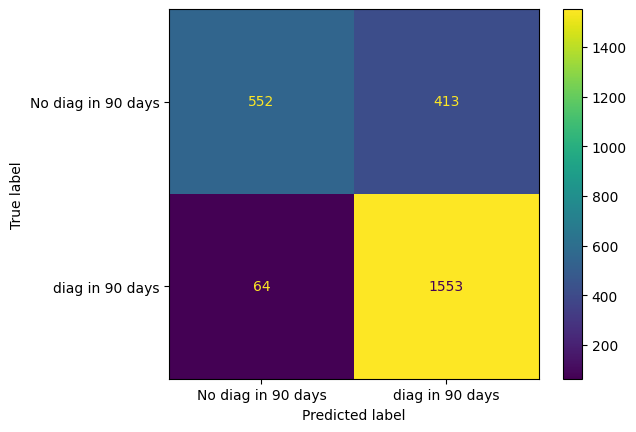

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import  confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_pipeline.fit(X = X_train,
                y = y_train)

predictions_xgb = xgb_pipeline.predict(X_val)

cm_xgb = confusion_matrix(y_val, predictions_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No diag in 90 days', 'diag in 90 days'])
disp.plot()
plt.show()

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>5B |</span></b> <b>MODEL: LGBM</b></div>

In [34]:
#lgb library
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [35]:
# #LGBM Best parameters:  {'max_depth': 8, 'min_child_samples': 12, 'learning_rate': 0.017678475266971593, 'n_estimators': 231, 'subsample': 0.9104835434973406, 'colsample_bytree': 0.8338895090365834, 'reg_alpha': 0.8845547682577022, 'reg_lambda': 0.8709017737582414}
lgbm_params_optuna =  {'max_depth': 8, 
                       'min_child_samples': 12, 
                       'learning_rate': 0.017678475266971593, 
                       'n_estimators': 231, 
                       'subsample': 0.9104835434973406, 
                       'colsample_bytree': 0.8338895090365834, 
                       'reg_alpha': 0.8845547682577022, 
                       'reg_lambda': 0.8709017737582414}

    
# lgbm model
lgbm_model = LGBMClassifier(**lgbm_params_optuna)

lgbm_pipeline = make_pipeline(modelling_pipeline, lgbm_model)
lgbm_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('meanimpute',
                                  MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family...
                                  RenameColumns(replace_dict={32: '_', 40: '_',
                                                              41: '_', 44: '_',
                                                              58: '_', 91: '_',
                                                              93: '_'})),
                                 ('scale', RobustScaler())])),
                ('lgbmclassifier',
                 LGBMClassifier(colsample_bytree=0.8338895090365834,
                                learning_rate=0.017678475266971593, max_depth=8,
                                min_child_samples=12, n_estimators=231,
                                reg_alpha=0.8845547682577022,
                                reg_lambda=0.8709017737582414,
                                subsample=0.9104835434973406))])

In [36]:
from sklearn.metrics import log_loss

# folds
n_splits = 10

# StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_results = []


for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    lgbm_pipeline.fit(X_train,y_train)

    y_val_pred_prob = lgbm_pipeline.predict_proba(X_val)
    y_pred = lgbm_pipeline.predict(X_val)
        
    f1=  f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    logloss = log_loss(y_val, y_val_pred_prob)
    roc_auc = roc_auc_score(y_val, y_pred)
    print(f'Fold {fold + 1}, AUC-Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print(f'Fold {fold + 1}, Log Loss Score on Validation Set: {logloss}')
    print('-'*70)

    cv_results.append(roc_auc)
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-SCORE across {n_splits} folds: {average_cv_result}')

Fold 1, AUC-Score on Validation Set: 0.7580888183980968
Fold 1, F1 Score on Validation Set: 0.7959792024973639
Fold 1, Log Loss Score on Validation Set: 0.472475937287479
----------------------------------------------------------------------
Fold 2, AUC-Score on Validation Set: 0.7490202348366631
Fold 2, F1 Score on Validation Set: 0.7880644548855238
Fold 2, Log Loss Score on Validation Set: 0.4762004583682857
----------------------------------------------------------------------
Fold 3, AUC-Score on Validation Set: 0.7657248471515182
Fold 3, F1 Score on Validation Set: 0.8035120297343195
Fold 3, Log Loss Score on Validation Set: 0.4695102026715283
----------------------------------------------------------------------
Fold 4, AUC-Score on Validation Set: 0.7646939193164667
Fold 4, F1 Score on Validation Set: 0.802587163550081
Fold 4, Log Loss Score on Validation Set: 0.46521118098494785
----------------------------------------------------------------------
Fold 5, AUC-Score on Validati

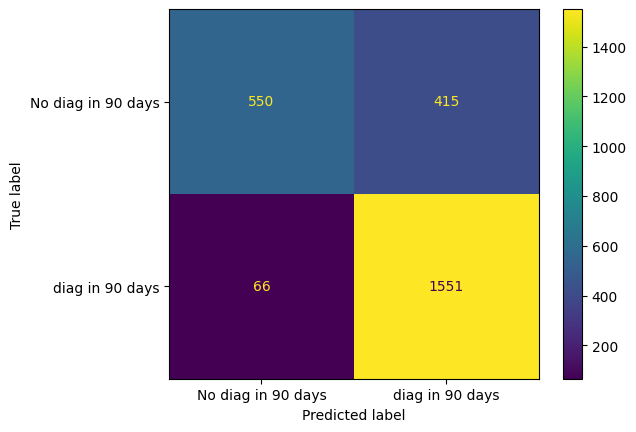

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

lgbm_pipeline.fit(X = X_train,
                y = y_train)

predictions_lgbm = lgbm_pipeline.predict(X_val)

cm_lgbm = confusion_matrix(y_val, predictions_lgbm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm, display_labels=['No diag in 90 days', 'diag in 90 days'])
disp.plot()
plt.show()

In [38]:
#Checking for columns with non-JSON compliant characters
# import re

# # Define a regular expression pattern to match non-JSON compliant characters
# json_compliant_pattern = re.compile(r'[^a-zA-Z0-9_\.+\-]')

# # Identify columns with non-JSON compliant characters
# problematic_columns = [col for col in df_train.columns if json_compliant_pattern.search(col)]

# print("Columns with non-JSON compliant characters:")
# print(problematic_columns)

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>5C |</span></b> <b>MODEL: CATBOOST</b></div>

In [39]:
#catboost library
from catboost import CatBoostClassifier

In [40]:
# catboost_params_optuna = {'iterations': 1458, 'depth': 4, 'min_data_in_leaf': 20, 'learning_rate': 0.005188043690019869, 'l2_leaf_reg': 0.10639625012390935, 'border_count': 84, 'subsample': 0.8787385369399177, 'colsample_bylevel': 0.931406452115905}

catboost_params_optuna = {'iterations': 1458, 
                          'depth': 4, 
                          'min_data_in_leaf': 20, 
                          'learning_rate': 0.005188043690019869, 
                          'l2_leaf_reg': 0.10639625012390935, 
                          'border_count': 84, 
                          'subsample': 0.8787385369399177, 
                          'colsample_bylevel': 0.931406452115905}

# catboost model
cb_model = CatBoostClassifier(**catboost_params_optuna, random_state=42, verbose=0)


cb_pipeline = make_pipeline(modelling_pipeline, cb_model)
cb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('meanimpute',
                                  MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family...
                                                                    'patient_gender',
                                                                    'Division',
                                                                    'breast_cancer_diagnosis_desc',
                                                                    'patient_state'])])),
                                 ('replacedouble',
                                  <__main__.ReplaceDoubleUnderscores object at 0x7841de317f70>),
                                 ('rename_columns',
                                  RenameColumns(replace_dict={32: '_', 40: '_',
                                                              41: '_', 44: '_',
                                                              58: '_', 91: '_',
                                                              93: '_'})),
                                 ('scale', RobustScaler())])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x784122340b80>)])

In [41]:
n_splits = 10

stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


cv_results = []


for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    
    cb_pipeline.fit(X_train,y_train)

    y_val_pred_prob = cb_pipeline.predict_proba(X_val)
    y_pred = cb_pipeline.predict(X_val)
        
    f1=  f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    logloss = log_loss(y_val, y_val_pred_prob)
    roc_auc = roc_auc_score(y_val, y_pred)
    print(f'Fold {fold + 1}, AUC- score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print(f'Fold {fold + 1}, Log Loss Score on Validation Set: {logloss}')
    print('-'*70)

 
    cv_results.append(logloss)

average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage Logarithmic Loss across {n_splits} folds: {average_cv_result}')

Fold 1, AUC- score on Validation Set: 0.7580888183980968
Fold 1, F1 Score on Validation Set: 0.7959792024973639
Fold 1, Log Loss Score on Validation Set: 0.47179745256496947
----------------------------------------------------------------------
Fold 2, AUC- score on Validation Set: 0.7506715100662557
Fold 2, F1 Score on Validation Set: 0.789726694455049
Fold 2, Log Loss Score on Validation Set: 0.4790204187185936
----------------------------------------------------------------------
Fold 3, AUC- score on Validation Set: 0.7632524110409045
Fold 3, F1 Score on Validation Set: 0.801459510824166
Fold 3, Log Loss Score on Validation Set: 0.4691691078626397
----------------------------------------------------------------------
Fold 4, AUC- score on Validation Set: 0.7632524110409045
Fold 4, F1 Score on Validation Set: 0.801459510824166
Fold 4, Log Loss Score on Validation Set: 0.4677797782514972
----------------------------------------------------------------------
Fold 5, AUC- score on Vali

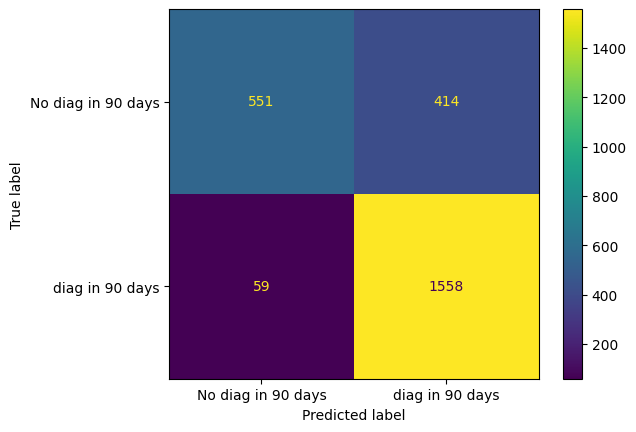

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

cb_pipeline.fit(X = X_train,
                y = y_train)

predictions_cb = cb_pipeline.predict(X_val)

cm_cb = confusion_matrix(y_val, predictions_cb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_cb, display_labels=['No diag in 90 days', 'diag in 90 days'])
disp.plot()
plt.show()

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>6 |</span></b> <b>EVALUATION</b></div>

## Permutation Importance

In [43]:
from sklearn.inspection import permutation_importance

In [44]:
%time
result = permutation_importance(xgb_pipeline, X_val, y_val, n_repeats=10, random_state=42, n_jobs=2)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


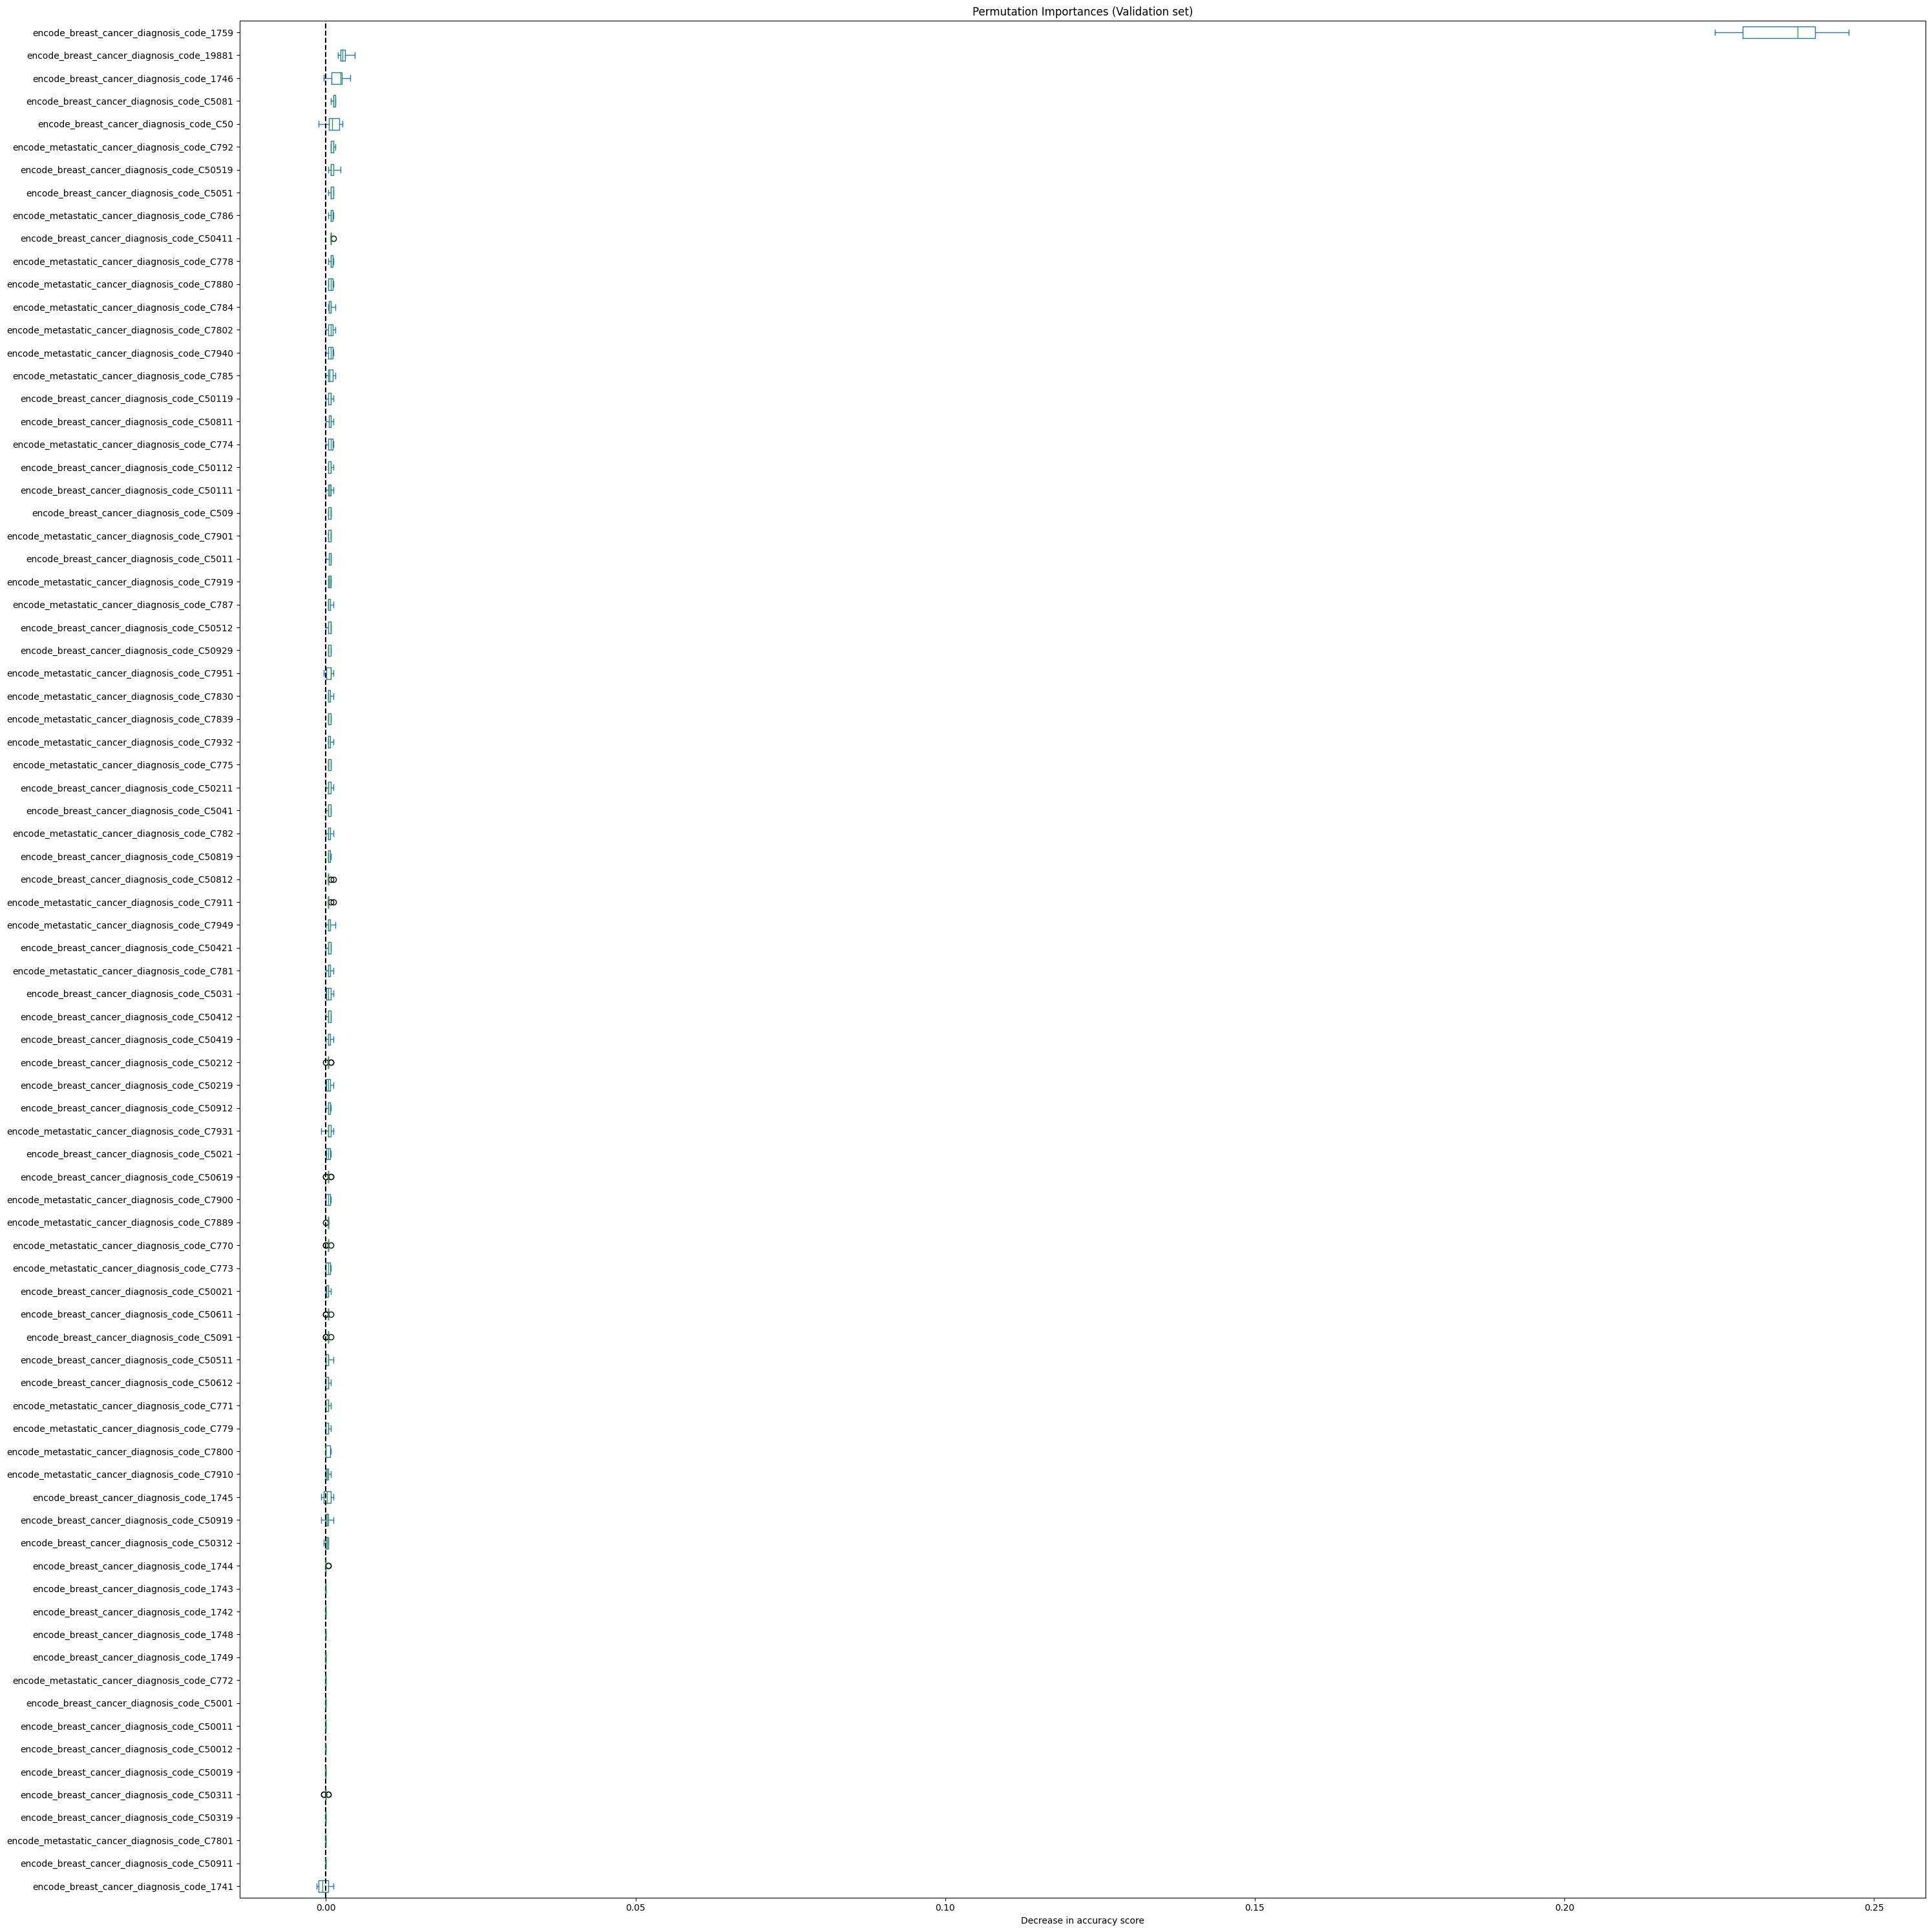

In [45]:
# Sort the importances
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=df_train.columns[sorted_importances_idx],
)

# Create a larger figure
fig, ax = plt.subplots(figsize=(30, 30))  # Adjust the figsize as needed

# Create the box plot
importances.plot.box(vert=False, whis=10, ax=ax)
ax.set_title("Permutation Importances (Validation set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# Show the plot
plt.show()

## Feature Importance

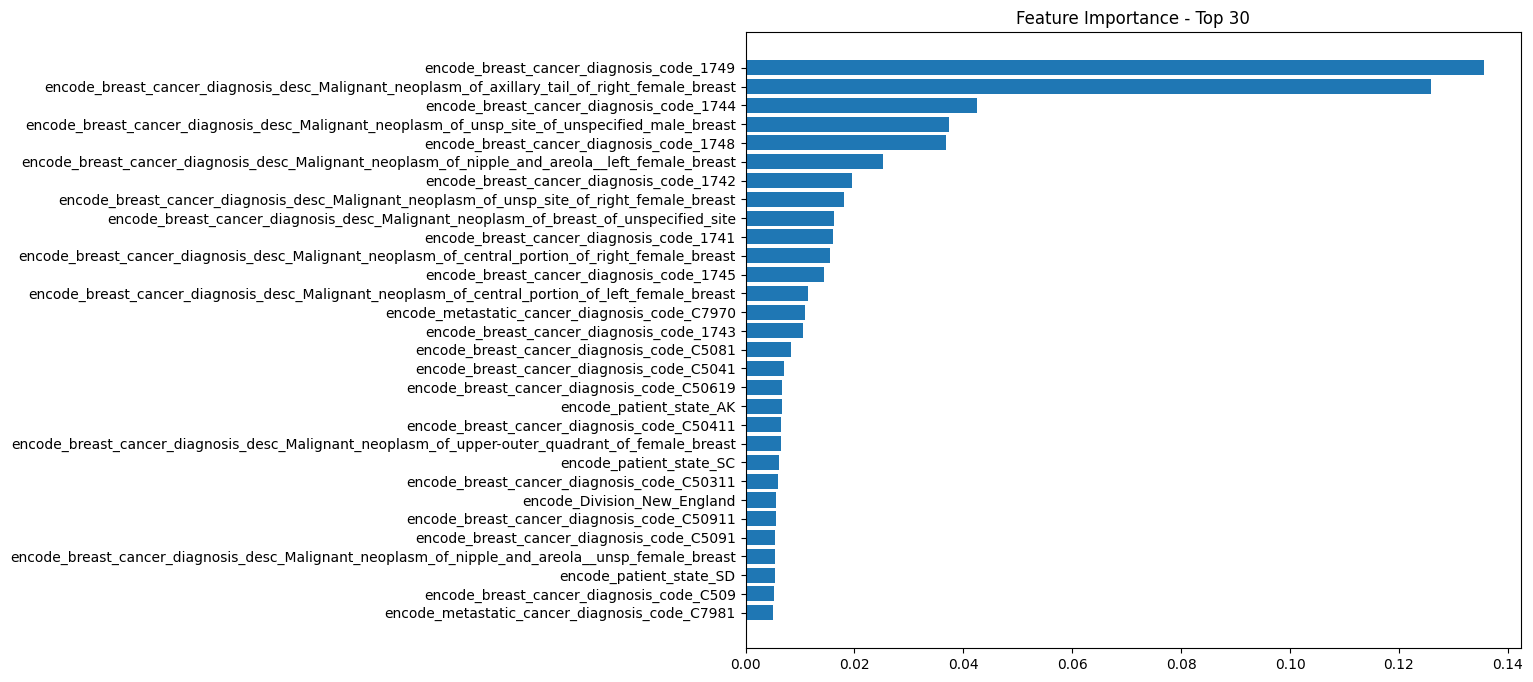

In [46]:
TOP = 30

feature_importance = xgb_model.feature_importances_

# Get the feature names from 'train'
feature_names = df_train.columns

# Sort the feature importances and get the indices of the sorted array
sorted_idx = np.argsort(feature_importance)

# Plot only the top 'TOP' features
fig = plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(sorted_idx))[-TOP:], feature_importance[sorted_idx][-TOP:], align='center')
plt.yticks(np.arange(len(sorted_idx))[-TOP:], feature_names[sorted_idx][-TOP:])
plt.title(f'Feature Importance - Top {TOP}')
plt.show()

In [47]:
## SHAP values

100%|===================| 2578/2582 [00:41<00:00]       

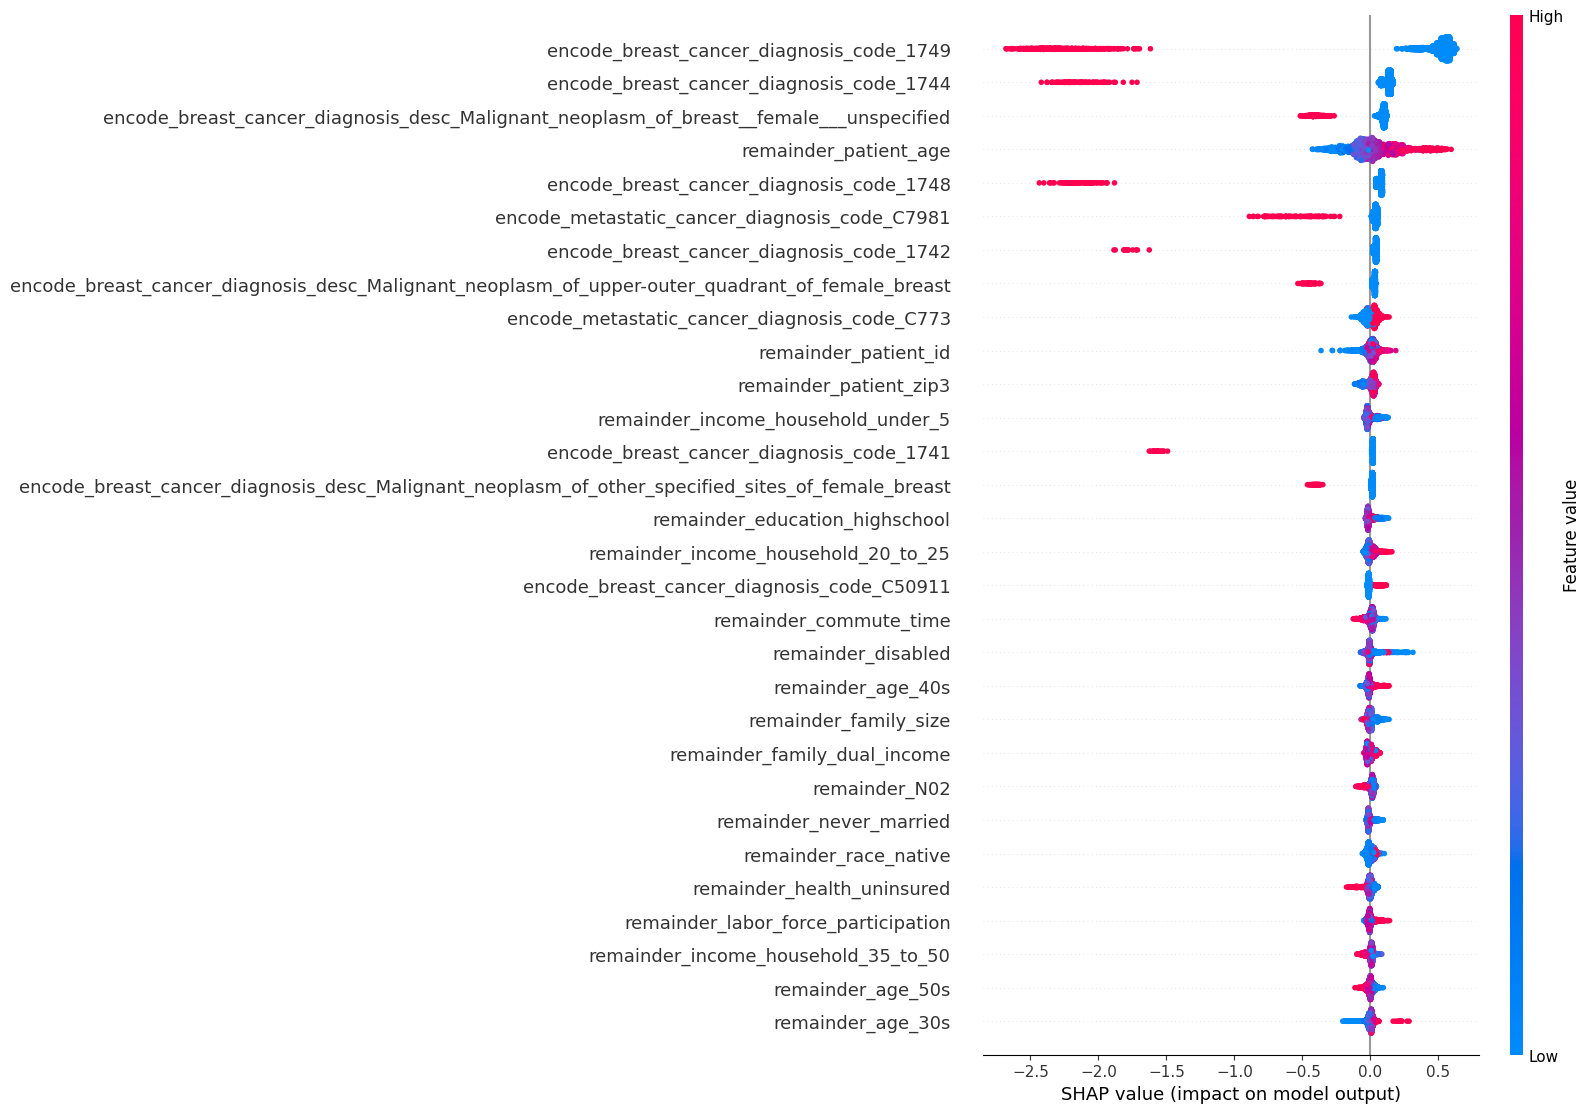

In [48]:
import shap

# Create a pipeline that includes your preprocessing steps and the XGBoost model
combined_pipeline = Pipeline([
    ('preprocessing', modelling_pipeline),
    ('xgboost', xgb_model)
])

# Assuming 'X_val' is your validation set
X_val_preprocessed = combined_pipeline.named_steps['preprocessing'].transform(X_val)

# Create a new SHAP explainer
explainer = shap.Explainer(combined_pipeline.named_steps['xgboost'], X_val_preprocessed)

# Calculate SHAP values
shap_values = explainer.shap_values(X_val_preprocessed)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_val_preprocessed, max_display=TOP)

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>7A |</span></b> <b>SUBMISSION: BASELINE</b></div>

In [49]:
# # Fit the ensemble final model
# xgb_pipeline.fit(X, y)

# # Create submission file with probability predictions
# predictions = xgb_pipeline.predict_proba(test)[:, 1]  # Use the probabilities of class 1

# sample_submission['DiagPeriodL90D'] = predictions
# sample_submission.to_csv('submission_baseline.csv', index=False)

In [50]:
# sample_submission.head()

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>7B |</span></b> <b>SUBMISSION: ENSEMBLE</b></div>

In [51]:
from sklearn.ensemble import VotingClassifier

In [52]:
ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_pipeline),
    ('lgb', lgbm_pipeline),
    ('cb', cb_pipeline)
        
]
                                  , voting='soft',
                                  weights = [0.007848145476906165, 0.9921518545230938, 0.0]) 

ensemble_model

VotingClassifier(estimators=[('xgb',
                              Pipeline(steps=[('pipeline',
                                               Pipeline(steps=[('meanimpute',
                                                                MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorce...
                                                               ('replacedouble',
                                                                <__main__.ReplaceDoubleUnderscores object at 0x7841de317f70>),
                                                               ('rename_columns',
                                                                RenameColumns(replace_dict={32: '_',
                                                                                            40: '_',
                                                                                            41: '_',
                                                                                            44: '_',
                                                                                            58: '_',
                                                                                            91: '_',
                                                                                            93: '_'})),
                                                               ('scale',
                                                                RobustScaler())])),
                                              ('catboostclassifier',
                                               <catboost.core.CatBoostClassifier object at 0x784122340b80>)]))],
                 voting='soft',
                 weights=[0.007848145476906165, 0.9921518545230938, 0.0])

In [53]:
# # number of folds
# n_splits = 10

# #  StratifiedKFold
# stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# #  cross-validation results
# cv_results = []

# # stratified k-fold cross-validation
# for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
#     X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
#     y_train, y_val = y[train_idx], y[val_idx]

#     ensemble_model.fit(X_train, y_train )

#     # predictions on the validation set
#     y_val_pred_prob = ensemble_model.predict_proba(X_val)
#     y_pred = ensemble_model.predict(X_val)
        
#     f1=  f1_score(y_val, y_pred, average='weighted')
#     logloss = log_loss(y_val, y_val_pred_prob,)
#     roc_auc = roc_auc_score(y_val, y_pred)

#     # Evaluating the model
    
#     print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
#     print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
#     print(f'Fold {fold + 1}, Log Loss Score on Validation Set: {logloss}')
#     print('-'*70)

#     # results
#     cv_results.append(roc_auc)

# # average cross-validation result
# average_cv_result = sum(cv_results) / n_splits
# print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')

In [54]:
# # Assuming trainX and trainy are your features and target variable
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ensemble_model.fit(X = X_train, y = y_train)

# predictions_ensemble = ensemble_model.predict(X_val)

# cm_ensemble = confusion_matrix(y_val, predictions_ensemble)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble, display_labels=['No diag in 90 days', 'diag in 90 days'])
# disp.plot()
# plt.show()

In [55]:
# Fit the ensemble final model
ensemble_model.fit(X, y)

# Create submission file with probability predictions
predictions = ensemble_model.predict_proba(test)[:, 1]  # Use the probabilities of class 1

sample_submission['DiagPeriodL90D'] = predictions
sample_submission.to_csv('submission_ensemble.csv', index=False)

In [56]:
sample_submission.head()

,patient_id,DiagPeriodL90D
0,573710,0.817758
1,593679,0.766919
2,184532,0.794223
3,447383,0.771202
4,687972,0.819645


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>8 |</span></b> <b>HYPERPARAMETER TUNING</b></div>


## XGB Hyperparameter Tuning

In [57]:
import optuna
from sklearn.model_selection import  cross_val_score

import warnings
# Set global warning filter
warnings.filterwarnings("ignore")

In [58]:
# import xgboost as xgb

# def objective_xgb(trial):
#     """Define the objective function for XGBClassifier"""

#     params = {
#         'max_depth': trial.suggest_int('max_depth', 5, 10),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
#         'n_estimators': trial.suggest_int('n_estimators', 150, 1000),
#         'subsample': trial.suggest_float('subsample', 0.01, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
#         'random_state': trial.suggest_categorical('random_state', [42]),
#         'tree_method': 'hist',  
#         'device' : 'cuda',
#         'eval_metric': 'auc',  # Evaluation metric
#         'verbosity': 2,  # Set verbosity to 0 for less output
#     }

#     xgb_model = xgb.XGBClassifier(**params)
#     xgb_pipeline = make_pipeline(modelling_pipeline, xgb_model)

#     cv = abs(cross_val_score(xgb_pipeline, X, y, cv=skf, scoring='roc_auc').mean())

#     return cv

# # Define a pruning callback for Optuna
# def pruning_callback(study, trial):
#     if study.best_trial.number != trial.number:
#         # Prune if the trial is not the current best
#         if study.trials[trial.number].intermediate_values:
#             last_value = max(study.trials[trial.number].intermediate_values.values())
#             if last_value < study.best_value:
#                 raise optuna.TrialPruned()
            
# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective_xgb, n_trials=30, callbacks=[pruning_callback])

# # Get the best parameters
# best_params_xgb = study.best_params
# print("Best Hyperparameters for XGBoost:", best_params_xgb)

Best Hyperparameters for XGBoost: {'max_depth': 7, 'min_child_weight': 4, 'learning_rate': 0.018326241087878215, 'n_estimators': 353, 'subsample': 0.53900038560299, 'colsample_bytree': 0.7509105072895826, 'random_state': 42} Best is trial 15 with value: 0.7929997266391136.

## LGBM Hyperparameter Tuning

In [59]:
# # Define a pruning callback for Optuna
# def pruning_callback(study, trial):
#     if study.best_trial.number != trial.number:
#         # Prune if the trial is not the current best
#         if study.trials[trial.number].intermediate_values:
#             last_value = max(study.trials[trial.number].intermediate_values.values())
#             if last_value < study.best_value:
#                 raise optuna.TrialPruned()

# def objective_lgbm(trial):
#     """Define the objective function for LGBMClassifier"""

#     params = {
#         'objective': 'binary',  # Objective for binary classification
#         'boosting_type': 'gbdt',
#         'device': 'gpu',
#         'metric': 'auc',  # Evaluation metric
#         'max_depth': trial.suggest_int('max_depth', 5, 10),
#         'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
#         'n_estimators': trial.suggest_int('n_estimators', 150, 1000),
#         'subsample': trial.suggest_float('subsample', 0.1, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
#         'random_state': 42,
#     }

#     lgb_model = lgb.LGBMClassifier(**params)
#     lgb_pipeline = make_pipeline(modelling_pipeline, lgb_model)

#     # Assuming 'trainX' and 'trainy' are your training data
#     cv = abs(cross_val_score(lgb_pipeline, X, y, cv=skf, scoring='roc_auc').mean())

#     return cv

# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective_lgbm, n_trials=30, callbacks=[pruning_callback])

# # Get the best parameters
# best_params_lgb = study.best_params
# print("Best Hyperparameters for LGBM:", best_params_lgb)

Best Hyperparameters for LGBM: {'max_depth': 8, 'min_child_samples': 12, 'learning_rate': 0.017678475266971593, 'n_estimators': 231, 'subsample': 0.9104835434973406, 'colsample_bytree': 0.8338895090365834, 'reg_alpha': 0.8845547682577022, 'reg_lambda': 0.8709017737582414} Best is trial 21 with value: 0.8008016934315798.

## CATBoost Hyperparameter Tuning

In [60]:
# params = {
#         'iterations': trial.suggest_int('iterations', 500, 1000),
#         'depth': trial.suggest_int('depth', 5, 15),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.2, log=True),
#         }

In [61]:
# # Suppress FutureWarnings related to is_sparse
# warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# def objective(trial):
#     params = {
#     'iterations': trial.suggest_int('iterations', 500, 2000),
#     'depth': trial.suggest_int('depth', 4, 16),
#     'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 20),
#     'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
#     'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 1.0, log=True),
#     'border_count': trial.suggest_int('border_count', 32, 255),
#     'subsample': trial.suggest_float('subsample', 0.6, 1.0),
#     'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.6, 1.0),
# }
    
#     # Enable early stopping
#     early_stopping_rounds = 10  # Adjust as needed
    
#     cb_model = CatBoostClassifier(**params, 
#                                   random_state=42, 
#                                   grow_policy='Lossguide', 
#                                   verbose=0, od_type='Iter', # Early stopping based on iterations
#                                   od_wait=early_stopping_rounds,)
    
#     cb_pipeline = make_pipeline(modelling_pipeline, cb_model)

#     # Using cross_val_score with 'cv' parameter
#     cv = cross_val_score(cb_pipeline, X, y, cv=skf, scoring='roc_auc', n_jobs=-1).mean()

#     return cv

# # Create an Optuna study with pruning
# study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())

# # Perform the optimization with more trials
# study.optimize(objective, n_trials=30)

# # Get the best hyperparameters
# best_params_cb = study.best_params
# print("Best Hyperparameters for CatBoost:", best_params_cb)

Best Hyperparameters for CatBoost: {'iterations': 1458, 'depth': 4, 'min_data_in_leaf': 20, 'learning_rate': 0.005188043690019869, 'l2_leaf_reg': 0.10639625012390935, 'border_count': 84, 'subsample': 0.8787385369399177, 'colsample_bylevel': 0.931406452115905} Best is trial 12 with value: 0.7982674966295005.

## Ensemble Weights Hyperparameter Tuning

In [62]:
# # Define the parameter search space
# def objective(trial):
#     weight_xgb = trial.suggest_float('weight_xgb', 0, 2)  # Adjust the range based on your expectations
#     weight_lgb = trial.suggest_float('weight_lgb', 0, 2)
    
#     # Calculate the sum of weights
#     total_weight = weight_xgb + weight_lgb
    
#     # Normalize the weights to ensure they sum to 1
#     weight_xgb /= total_weight
#     weight_lgb /= total_weight
    
#     # Calculate the weight for CatBoost
#     weight_cb = 1.0 - weight_xgb - weight_lgb

#     weights = [weight_xgb, weight_lgb, weight_cb]

#     ensemble_model = VotingClassifier(
#         estimators=[
#             ('xgb', xgb_pipeline),
#             ('lgb', lgbm_pipeline),
#             ('cb', cb_pipeline)
#         ], voting='soft', weights=weights)

#     # Assuming 'trainX' and 'trainy' are your training data
#     cv = abs(cross_val_score(ensemble_model, X, y, cv=skf, scoring='roc_auc').mean())

#     return cv

# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# # Use the 'sampler' parameter for parallelization
# study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=2024))
# study.optimize(objective, n_trials=30)

# best_weights = study.best_params
# print("Best Weights for Ensemble:", best_weights)


Trial 11 finished with value: 0.8003973738116041 and parameters: {'weight_xgb': 0.015094638632585866, 'weight_lgb': 1.9082436426216445}. Best is trial 11 with value: 0.8003973738116041.

In [63]:
weight_xgb= 0.015094638632585866
weight_lgb= 1.9082436426216445

total_weight = weight_xgb + weight_lgb
    
# Normalize the weights to ensure they sum to 1
weight_xgb /= total_weight
weight_lgb /= total_weight
    
# Calculate the weight for CatBoost
weight_cb = 1.0 - weight_xgb - weight_lgb

weights = [weight_xgb, weight_lgb, weight_cb]
weights

[0.007848145476906165, 0.9921518545230938, 0.0]

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>X |</span></b> <b>Futherwork</b></div>
- Feature engineering: Binning of numerical fields